In [2]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [3]:
budgVol = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_vol.nc').budg_vol
budgSlt = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_slt.nc').budg_salt
budgSln = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_sln.nc').budg_sln

### Plot

In [4]:
class OffsetYearLocator(dates.YearLocator):
    def __init__(self, *args, **kwargs):
        self.offset = kwargs.pop("offset", 0)
        dates.YearLocator.__init__(self,*args, **kwargs)
    def tick_values(self, vmin, vmax):
        ymin = self.base.le(vmin.year) * self.base.step - self.offset
        ymax = self.base.ge(vmax.year) * self.base.step + (self.base.step-self.offset)
        ticks = [vmin.replace(year=ymin, **self.replaced)]
        while True:
            dt = ticks[-1]
            if dt.year >= ymax:
                return dates.date2num(ticks)
            year = dt.year + self.base.step
            ticks.append(dt.replace(year=year, **self.replaced))

def format_xaxis(ax):

    years = dates.YearLocator(10,month=1,day=1)
    years1=OffsetYearLocator(2,month=1,day=1, offset=1)
    dfmt = dates.DateFormatter('%Y')
    dfmt1 = dates.DateFormatter('%y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(years1)
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_minor_formatter(dfmt1)
    ax.get_xaxis().set_tick_params(which='major', pad=15)

    plt.setp(ax.get_xmajorticklabels(), rotation=0, weight="bold", ha="center")

In [10]:
budgSln.term

<xarray.DataArray 'term' (term: 8)>
array(['tendSln', 'forcSln', 'adv_ConvSln', 'dif_ConvSln', 'ConvSln',
       'totalSln', 'ConvVSln', 'SlnV'], dtype=object)
Coordinates:
  * term     (term) object 'tendSln' 'forcSln' ... 'ConvVSln' 'SlnV'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


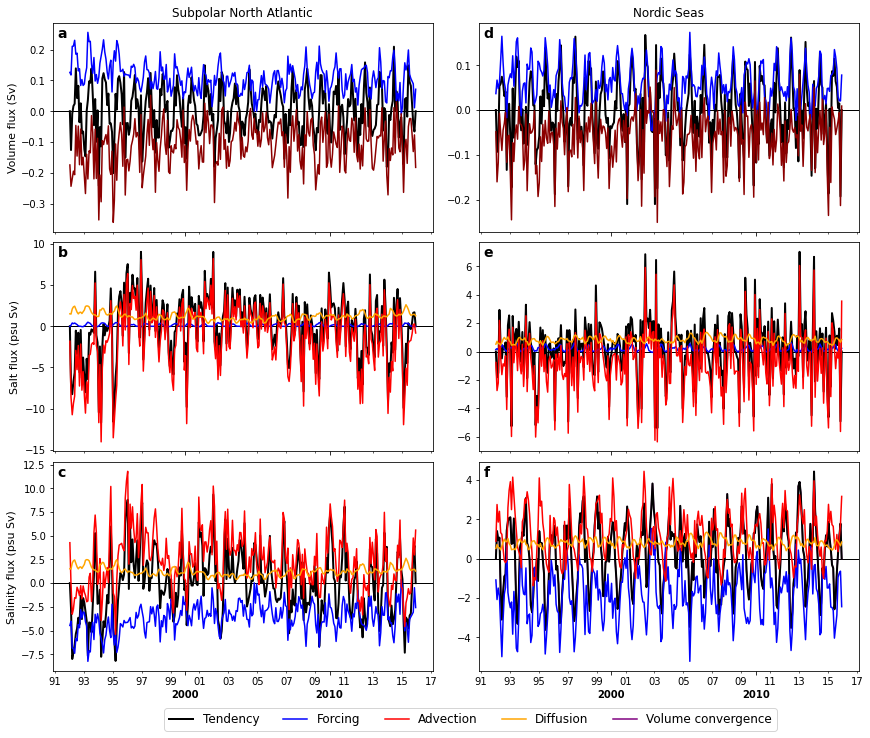

In [44]:
fig, axs = plt.subplots(3, 2,sharex=True, figsize=(14, 12))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(budgVol.time, budgVol.sel(region='spna',term='tendV'), lw=2, color='black',label='Tendency')
axs[0,0].plot(budgVol.time, budgVol.sel(region='spna',term='forcV'), lw=1.5, color='blue',label='Forcing')
axs[0,0].plot(budgVol.time, budgVol.sel(region='spna',term='ConvV'), lw=1.5, color='darkred',
              label='Volume convergence')
axs[0,0].set_ylabel(r'Volume flux (Sv)',fontsize=11)
axs[0,0].text(0.013,0.93, 'a', fontsize=14, fontweight='bold', transform=axs[0,0].transAxes)
axs[0,0].set_title(r'Subpolar North Atlantic', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(budgSlt.time, budgSlt.sel(region='spna',term='tendS'), lw=2, color='black',label='Tendency')
axs[1,0].plot(budgSlt.time, budgSlt.sel(region='spna',term='forcS'), lw=1.5, color='blue',label='Forcing')
axs[1,0].plot(budgSlt.time, budgSlt.sel(region='spna',term='adv_ConvS'), lw=1.5, color='red',label='Advection')
axs[1,0].plot(budgSlt.time, budgSlt.sel(region='spna',term='dif_ConvS'), lw=1.5, color='orange',label='Diffusion')
axs[1,0].set_ylabel(r'Salt flux (psu Sv)', fontsize=11)
axs[1,0].text(0.013,0.93, 'b', fontsize=14, fontweight='bold', transform=axs[1,0].transAxes)

axs[2,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,0].plot(budgSln.time, budgSln.sel(region='spna',term='tendSln'), lw=2, color='black',label='Tendency')
axs[2,0].plot(budgSln.time, budgSln.sel(region='spna',term='forcSln'), lw=1.5, color='blue',label='Forcing')
axs[2,0].plot(budgSln.time, budgSln.sel(region='spna',term='adv_ConvSln'), lw=1.5, color='red',label='Advection')
axs[2,0].plot(budgSln.time, budgSln.sel(region='spna',term='dif_ConvSln'), lw=1.5, color='orange',label='Diffusion')
axs[2,0].set_ylabel(r'Salinity flux (psu Sv)',fontsize=11)
axs[2,0].text(0.013,0.93, 'c', fontsize=14, fontweight='bold', transform=axs[2,0].transAxes)
format_xaxis(axs[2,0])

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(budgVol.time, budgVol.sel(region='nsea',term='tendV'), lw=2, color='black',label='Tendency')
axs[0,1].plot(budgVol.time, budgVol.sel(region='nsea',term='forcV'), lw=1.5, color='blue',label='Forcing')
axs[0,1].plot(budgVol.time, budgVol.sel(region='nsea',term='ConvV'), lw=1.5, color='darkred',
              label='Volume convergence')
axs[0,1].text(0.013,0.93, 'd', fontsize=14, fontweight='bold', transform=axs[0,1].transAxes)
axs[0,1].set_title(r'Nordic Seas', fontsize=12)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(budgSlt.time, budgSlt.sel(region='nsea',term='tendS'), lw=2, color='black',label='Tendency')
axs[1,1].plot(budgSlt.time, budgSlt.sel(region='nsea',term='forcS'), lw=1.5, color='blue',label='Forcing')
axs[1,1].plot(budgSlt.time, budgSlt.sel(region='nsea',term='adv_ConvS'), lw=1.5, color='red',label='Advection')
axs[1,1].plot(budgSlt.time, budgSlt.sel(region='nsea',term='dif_ConvS'), lw=1.5, color='orange',label='Diffusion')
axs[1,1].text(0.013,0.93, 'e', fontsize=14, fontweight='bold', transform=axs[1,1].transAxes)

axs[2,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,1].plot(budgSln.time, budgSln.sel(region='nsea',term='tendSln'), lw=1.5, color='purple',
              label='Volume Convergence')
axs[2,1].plot(budgSln.time, budgSln.sel(region='nsea',term='tendSln'), lw=2, color='black',label='Tendency')
axs[2,1].plot(budgSln.time, budgSln.sel(region='nsea',term='forcSln'), lw=1.5, color='blue',label='Forcing')
axs[2,1].plot(budgSln.time, budgSln.sel(region='nsea',term='adv_ConvSln'), lw=1.5, color='red',
              label='Salt/Salinity Advection')
axs[2,1].plot(budgSln.time, budgSln.sel(region='nsea',term='dif_ConvSln'), lw=1.5, color='orange',
              label='Salt/Salinity Diffusion')
axs[2,1].text(0.013,0.93, 'f', fontsize=14, fontweight='bold', transform=axs[2,1].transAxes)
format_xaxis(axs[2,1])

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)

handles, labels = axs[2,1].get_legend_handles_labels()
order = [1,2,0,3,4]
axs[2,1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],
                frameon=True, fancybox=True, bbox_to_anchor=(0.8, -0.15), ncol=3, fontsize=12)

plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
plt.savefig('/mnt/efs/figure.pdf')
plt.show()